# ENGG2112 Project

## 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Project_data.csv")

## 2. Data preprocess

### First check weather the data has NaN value

In [2]:
data.isna().any()
data.drop(['station'], axis=1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2


### Drop NaN value for the column 'wd' and use mean value to fill the NaN value for the other columns

In [3]:
data.dropna(subset=['wd'], inplace=True)
for i in list(data.columns[data.isnull().sum() >= 1]):
    mean_value = data[i].mean()
    data[i].fillna(mean_value, inplace=True)
data.isna().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5      False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

### Use one hot encoding to the column 'wd'

In [4]:
from sklearn.preprocessing import OneHotEncoder
tmp_df1 = data[['PM2.5', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'WSPM']]
tmp_df1.index = [i for i in range(tmp_df1.shape[0])]
new_col_name = ['PM2.5', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'WSPM'] + list(data['wd'].unique())
enc = OneHotEncoder().fit(data[['wd']])
tmp_df2 = enc.transform(data[['wd']]).toarray()
tmp_df2 = pd.DataFrame(tmp_df2)
new_df = pd.concat([tmp_df1, tmp_df2], axis=1)
new_df.columns = new_col_name
new_df.head()

,PM2.5,hour,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,...,NE,W,SSW,WSW,SE,WNW,SSE,ESE,S,SW
0,4.0,0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,1,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,2,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,3,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,4,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. 

In [5]:
import matplotlib.pyplot as plt

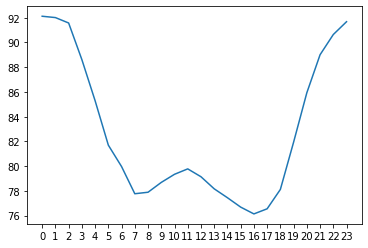

In [6]:
mean_by_hour = data.groupby(data['hour'])['PM2.5'].mean()

plt.plot(data['hour'].unique(), mean_by_hour)
plt.xticks(list(data['hour'].unique()))
plt.show()

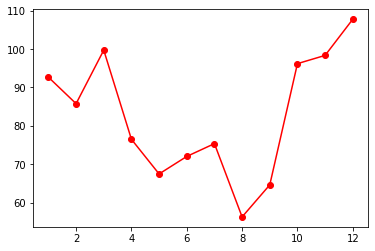

In [7]:
mean_by_month = data.groupby(data['month'])['PM2.5'].mean()
ls = list(data['month'].unique())
ls.sort()
plot2 = plt.plot(ls, mean_by_month, marker = 'o', color='r')

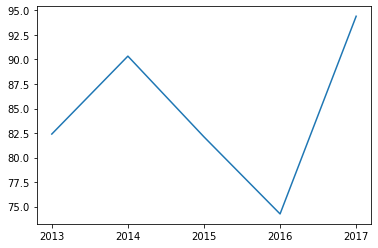

In [8]:
mean_by_year = data.groupby(data['year'])['PM2.5'].mean()
ls = list(data['year'].unique())
plt.xticks(ls)
plot3 = plt.plot(ls, mean_by_year)

#### AQI graph for PM2.5 (day)

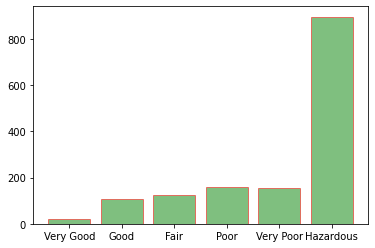

In [9]:
tmp = pd.read_csv("Project_data.csv")
tmp['PM2.5'].fillna(tmp['PM2.5'].mean(), inplace=True)
mean_by_day = tmp.groupby([tmp['year'], tmp['month'], tmp['day']])['PM2.5'].mean()
standard_pm2_5 = 25
total_aqi_pm2_5 = []
dict_aqi_pm2_5 = {
    'Very Good': 0,
    'Good': 0,
    'Fair': 0,
    'Poor': 0,
    'Very Poor': 0,
    'Hazardous': 0
}
for i in mean_by_day:
    total_aqi_pm2_5.append(i/standard_pm2_5 * 100)
for i in total_aqi_pm2_5:
    if i <= 33:
        dict_aqi_pm2_5['Very Good'] += 1
    if i > 33 and i <= 66:
        dict_aqi_pm2_5['Good'] += 1
    if i > 66 and i <= 99:
        dict_aqi_pm2_5['Fair'] += 1
    if i > 99 and i <= 149:
        dict_aqi_pm2_5['Poor'] += 1
    if i > 149 and i <= 200:
        dict_aqi_pm2_5['Very Poor'] += 1
    if i > 200:
        dict_aqi_pm2_5['Hazardous'] += 1

plt.bar(dict_aqi_pm2_5.keys(), dict_aqi_pm2_5.values(), facecolor='green', edgecolor='red', alpha=0.5)
plt.show()

In [10]:
# tmp = pd.read_csv("Project_data.csv")
# tmp['PM2.5'].fillna(tmp['PM2.5'].mean(), inplace=True)
# tmp = tmp.loc[tmp['year'] == 2014]
# mean_by_day = tmp.groupby([tmp['year'], tmp['month'], tmp['day']])['PM2.5'].mean()
# ls = []
# for i in range(len(tmp)):
#     if i % 24 == 0 and str(tmp.iloc[i][1]) == '2014':
#         date = str(tmp.iloc[i][1]) + '-' + str(tmp.iloc[i][2]) + '-' + str(tmp.iloc[i][3])
#         ls.append(date)
    
# plt.figure(figsize=(50,37))
# plt.xticks(rotation=90)
# plt.bar(ls, mean_by_day)
# plt.show()

#### Different standard for the PM2.5 (hour)

In [11]:
# dictionary = {
#     'Good': 0,
#     'Fair': 0,
#     'Poor': 0,
#     'Very poor': 0,
#     'Extremely poor': 0
# }

for i in range(len(new_df['PM2.5'])):
    if new_df.iloc[i][0] < 25:
        new_df.loc[i, 'PM2.5'] = 'Good'
#         dictionary['Good'] += 1
    elif new_df.iloc[i][0] >= 25 and new_df.iloc[i][0] < 50:
        new_df.loc[i, 'PM2.5'] = 'Fair'
#         dictionary['Fair'] += 1
    elif new_df.iloc[i][0] >= 50 and new_df.iloc[i][0] < 100:
        new_df.loc[i, 'PM2.5'] = 'Poor'
#         dictionary['Poor'] += 1
    elif new_df.iloc[i][0] >= 100 and new_df.iloc[i][0] < 300:
        new_df.loc[i, 'PM2.5'] = 'Very poor'
#         dictionary['Very poor'] += 1
    else:
        new_df.loc[i, 'PM2.5'] = 'Extremely poor'
#         dictionary['Extremely poor'] += 1

        
# plt.bar(dictionary.keys(), dictionary.values())
# plt.show()

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

df_train, df_test = train_test_split(new_df, test_size=0.4)

X_train, y_train = df_train.iloc[:, 1: ].to_numpy(), df_train['PM2.5'].to_numpy()
X_test, y_test = df_test.iloc[:, 1: ].to_numpy(), df_test['PM2.5'].to_numpy()

clf = LogisticRegression(max_iter = 100000, multi_class='multinomial')
clf.fit(X_train, y_train)

# Predict y_pred using the fitted model above
y_pred = clf.predict(X_test)

# Compute the average accuracy
acc = accuracy_score(y_test, y_pred)

print("Accuracy Score is: {}".format(acc))

Accuracy Score is: 0.7352436758610833


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

table = {
    'K': [],
    'ACC_KNN': [],
    'ACC_WNN': []
}

for k in [2, 3, 4, 5, 6, 7]:
    table['K'].append(k)
    
    df_train, df_test = train_test_split(new_df, test_size=0.2)

    X_train, y_train = df_train.iloc[:, 1: ].to_numpy(), df_train['PM2.5'].to_numpy()
    X_test, y_test = df_test.iloc[:, 1: ].to_numpy(), df_test['PM2.5'].to_numpy()

    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    wnn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    wnn.fit(X_train, y_train)
    
    pred_knn = knn.predict(X_test)
    pred_wnn = wnn.predict(X_test)
    
    acc_knn = accuracy_score(y_test, pred_knn)
    acc_wnn = accuracy_score(y_test, pred_wnn)
    table['ACC_KNN'].append(acc_knn)
    table['ACC_WNN'].append(acc_wnn)

table = pd.DataFrame(table)
table

,K,ACC_KNN,ACC_WNN
0,2,0.728312,0.750322
1,3,0.758897,0.763470
2,4,0.755895,0.772760
3,5,0.761183,0.771759
4,6,0.767186,0.781907
5,7,0.767186,0.773617


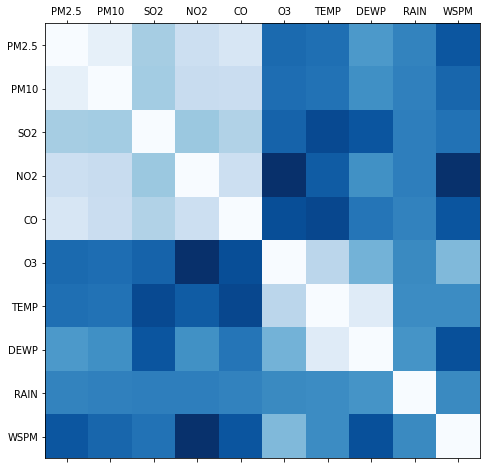

In [14]:
col = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'WSPM']
graph_data = data[col].corr()

fig, axes = plt.subplots(figsize=(8, 8))

graph = axes.matshow(graph_data)
graph.set_cmap("Blues_r")
axes.set_xticklabels(col)
axes.set_yticklabels(col)
axes.set_xticks(np.arange(len(col)))
axes.set_yticks(np.arange(len(col)))

fig.show()

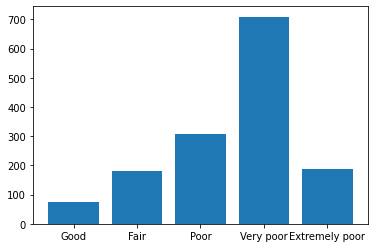

In [15]:
groupByDay = data.groupby([data['year'], data['month'], data['day']]).mean()
dictionary = {
    'Good': 0,
    'Fair': 0,
    'Poor': 0,
    'Very poor': 0,
    'Extremely poor': 0
}
tmp = {}
for i in range(len(groupByDay['PM2.5'])):
    if groupByDay.iloc[i][2] < 12.5:
        tmp[groupByDay.iloc[i][2]] = 'Good'
        dictionary['Good'] += 1
    elif groupByDay.iloc[i][2] >= 12.5 and groupByDay.iloc[i][2] < 25:
        tmp[groupByDay.iloc[i][2]] = 'Fair'
        dictionary['Fair'] += 1
    elif groupByDay.iloc[i][2] >= 25 and groupByDay.iloc[i][2] < 50:
        tmp[groupByDay.iloc[i][2]] = 'Poor'
        dictionary['Poor'] += 1
    elif groupByDay.iloc[i][2] >= 50 and groupByDay.iloc[i][2] < 150:
        tmp[groupByDay.iloc[i][2]] = 'Very poor'
        dictionary['Very poor'] += 1
    else:
        tmp[groupByDay.iloc[i][2]] = 'Extremely poor'
        dictionary['Extremely poor'] += 1

groupByDay['PM2.5'].replace(tmp, inplace = True)        
plt.bar(dictionary.keys(), dictionary.values())
plt.show()

### Logistic Regression

In [16]:
df_train, df_test = train_test_split(groupByDay, test_size=0.4)
X_train, y_train = df_train.iloc[:, 3: ].to_numpy(), df_train['PM2.5'].to_numpy()
X_test, y_test = df_test.iloc[:, 3: ].to_numpy(), df_test['PM2.5'].to_numpy()
clf = LogisticRegression(max_iter = 50000, multi_class='multinomial')
clf.fit(X_train, y_train)

# Predict y_pred using the fitted model above
y_pred = clf.predict(X_test)

# Compute the average accuracy
acc = accuracy_score(y_test, y_pred)

print("Accuracy Score is: {}".format(acc))

Accuracy Score is: 0.8017094017094017


### KNN and WNN

In [17]:
table = {
    'K': [],
    'ACC_KNN': [],
    'ACC_WNN': []
}

for k in [2, 3, 4, 5, 6, 7]:
    table['K'].append(k)
    
    df_train, df_test = train_test_split(groupByDay, test_size=0.2)

    X_train, y_train = df_train.iloc[:, 3: ].to_numpy(), df_train['PM2.5'].to_numpy()
    X_test, y_test = df_test.iloc[:, 3: ].to_numpy(), df_test['PM2.5'].to_numpy()

    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    wnn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    wnn.fit(X_train, y_train)
    
    pred_knn = knn.predict(X_test)
    pred_wnn = wnn.predict(X_test)
    
    acc_knn = accuracy_score(y_test, pred_knn)
    acc_wnn = accuracy_score(y_test, pred_wnn)
    table['ACC_KNN'].append(acc_knn)
    table['ACC_WNN'].append(acc_wnn)

table = pd.DataFrame(table)
table

,K,ACC_KNN,ACC_WNN
0,2,0.692833,0.709898
1,3,0.761092,0.767918
2,4,0.713311,0.709898
3,5,0.750853,0.737201
4,6,0.699659,0.699659
5,7,0.692833,0.696246


In [18]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

acc_mlp = 0
acc_lsvc = 0
acc_svc = 0

for i in range(20):
    df_train, df_test = train_test_split(groupByDay, test_size=0.1)

    X_train, y_train = df_train.iloc[:, 3: ].to_numpy(), df_train['PM2.5'].to_numpy()
    X_test, y_test = df_test.iloc[:, 3: ].to_numpy(), df_test['PM2.5'].to_numpy()

    LSVC = LinearSVC(penalty='l1', dual=False, max_iter=10000) #class_weight 可以修改
    svc = SVC(max_iter=10000)
    MLP = MLPClassifier(hidden_layer_sizes=(50,50), activation='logistic', learning_rate='adaptive', max_iter=10000)
    
    MLP.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    LSVC.fit(X_train, y_train)
    
    pred_lsvc = LSVC.predict(X_test)
    pred_mlp = MLP.predict(X_test)
    pred_svc = svc.predict(X_test)

    acc_lsvc += accuracy_score(y_test, pred_lsvc)
    acc_mlp += accuracy_score(y_test, pred_mlp)
    acc_svc += accuracy_score(y_test, pred_svc)

acc_lsvc /= 20
acc_mlp /= 20
acc_svc /= 20
print("Accuracy of LSVC is {}".format(acc_lsvc))
print("Accuracy of MLP classifier is {}".format(acc_mlp))
print("Accuracy of SVC is {}".format(acc_svc))

Accuracy of LSVC is 0.6911564625850342
Accuracy of MLP classifier is 0.7867346938775509
Accuracy of SVC is 0.6581632653061223


In [19]:
data_2017 = data.loc[data['year'] == 2017]
data_2017 = data_2017.groupby([data_2017['year'], data_2017['month'], data_2017['day']]).mean()
tmp = {}
for i in range(len(data_2017['PM2.5'])):
    if data_2017.iloc[i][2] < 12.5:
        tmp[data_2017.iloc[i][2]] = 'Good'
    elif data_2017.iloc[i][2] >= 12.5 and data_2017.iloc[i][2] < 25:
        tmp[data_2017.iloc[i][2]] = 'Fair'
    elif data_2017.iloc[i][2] >= 25 and data_2017.iloc[i][2] < 50:
        tmp[data_2017.iloc[i][2]] = 'Poor'
    elif data_2017.iloc[i][2] >= 50 and data_2017.iloc[i][2] < 150:
        tmp[data_2017.iloc[i][2]] = 'Very poor'
    else:
        tmp[data_2017.iloc[i][2]] = 'Extremely poor'

data_2017['PM2.5'].replace(tmp, inplace = True)   
test = data_2017.iloc[:, 3: ].to_numpy()
y_pred_2 = clf.predict(test)
acc_2 = accuracy_score(data_2017['PM2.5'], y_pred_2)
print("Accuracy score of this model used to predict the pm2.5 with the year 2017 is {}".format(acc_2))


Accuracy score of this model used to predict the pm2.5 with the year 2017 is 0.8305084745762712


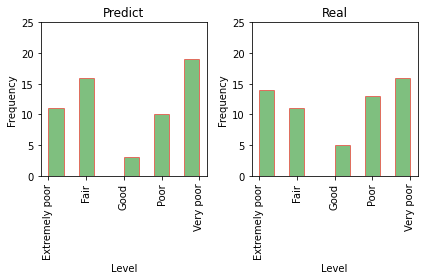

In [20]:
plt.subplots(1, 2)

plt.subplot(1, 2, 1)
y_pred_2.sort()
plt.xticks(rotation=90)
plt.ylim(0, 25)
plt.hist(y_pred_2, facecolor='green', edgecolor='red', alpha=0.5)
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.title('Predict')

plt.subplot(1, 2, 2)
tmp = list(data_2017['PM2.5'])
tmp.sort()
plt.xticks(rotation=90)
plt.ylim(0, 25)
true_hist = plt.hist(tmp, facecolor='green', edgecolor='red', alpha=0.5)
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.title('Real')
plt.tight_layout()

In [21]:
data2 = pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv')
data3 = pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv',parse_dates = ['time'])
data2.head()

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2015/01/01 00:00,Banqiao,16,2.1,0.79,0.14,1.2,16,17,37,...,NR,NR,57,12,2.2,0,69,69,4.7,4.2
1,2015/01/01 01:00,Banqiao,16,2.1,0.8,0.15,1.3,16,17,36,...,NR,NR,57,11,2.2,0,67,65,4,4
2,2015/01/01 02:00,Banqiao,16,2.1,0.71,0.13,1,13,14,38,...,NR,NR,57,8,2.2,0,63,53,3.7,3.5
3,2015/01/01 03:00,Banqiao,15,2,0.66,0.12,0.8,11,12,39,...,NR,NR,58,6.5,2.2,0,63,63,4.1,3.3
4,2015/01/01 04:00,Banqiao,15,2,0.53,0.11,0.6,10,11,38,...,NR,NR,58,5.5,2.1,0,69,67,3,3.1


In [22]:
no_nr_data = data2
no_nr_data.drop(no_nr_data[no_nr_data['RAINFALL'] == 'NR'].index, inplace = True)
no_nr_data.head()

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,...,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
107,2015/01/05 11:00,Banqiao,23,2,1.24#,0.55,19#,52#,71#,32#,...,0#,NR,55,5.3#,2.6,4.9,67,54,1.3,0.7
282,2015/01/12 18:00,Banqiao,16,2,0.77,0.24,3.6,29,32,21,...,0.2,NR,82,2.3,2.2,0,82,84,2.5,2.2
283,2015/01/12 19:00,Banqiao,16,2,0.66,0.21,4.2,27,31,21,...,0.2,NR,85,2,2.2,0,84,86,2.9,2.9
284,2015/01/12 20:00,Banqiao,16,2,0.59,0.19,4.1,25,29,22,...,0.4,64,86,2,2.2,0,75,81,3,2.7
285,2015/01/12 21:00,Banqiao,16,2,0.49,0.15,2.8,21,24,24,...,1,59,86,2,2.1,0,78,72,2.8,2.7


In [23]:
# col = ['CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PH_RAIN', 'PM10', 'PM2.5', 'RAINFALL', 'RH']
# graph = no_nr_data[col]
# print(graph.corr())
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))
print(no_nr_data['NO'])


no_nr_data['NO'] = no_nr_data['NO'].apply(numeric)

print(no_nr_data['NO'])
# fig, axes = plt.subplots(figsize=(8, 8))

# graphs = axes.matshow(graph)
# fig.show()

107       19#
282       3.6
283       4.2
284       4.1
285       2.8
         ... 
218554     14
218601     16
218603     16
218604     15
218631    11#
Name: NO, Length: 34010, dtype: object
107       19.0
282        3.6
283        4.2
284        4.1
285        2.8
          ... 
218554    14.0
218601    16.0
218603    16.0
218604    15.0
218631    11.0
Name: NO, Length: 34010, dtype: float64


In [24]:
# mean_by_year = data.groupby(data['year'])['PM2.5'].mean()
# ls = list(data['year'].unique())
# plt.xticks(ls)
# plot3 = plt.plot(ls, mean_by_year)

clean = ['CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PH_RAIN', 'PM10', 'PM2.5', 'RAINFALL', 'RH']
clean_data = no_nr_data[clean]

clean_data.drop(clean_data[clean_data['CH4'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['CO'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['NMHC'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['NO2'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['NOx'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['O3'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['PH_RAIN'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['PM10'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['PM2.5'] == 'NR'].index, inplace = True)
clean_data.drop(clean_data[clean_data['RH'] == 'NR'].index, inplace = True)

clean_data['CH4'] = clean_data['CH4'].apply(numeric)
clean_data['CO'] = clean_data['CO'].apply(numeric)
clean_data['NMHC'] = clean_data['NMHC'].apply(numeric)
clean_data['NO2'] = clean_data['NO2'].apply(numeric)
clean_data['NOx'] = clean_data['NOx'].apply(numeric)
clean_data['O3'] = clean_data['O3'].apply(numeric)
clean_data['PH_RAIN'] = clean_data['PH_RAIN'].apply(numeric)
clean_data['PM10'] = clean_data['PM10'].apply(numeric)
clean_data['PM2.5'] = clean_data['PM2.5'].apply(numeric)
clean_data['RAINFALL'] = clean_data['RAINFALL'].apply(numeric)
clean_data['RH'] = clean_data['RH'].apply(numeric)

print(clean_data.head())



     CH4    CO  NMHC   NO   NO2   NOx    O3  PH_RAIN  PM10  PM2.5  RAINFALL  \
284  2.0  0.59  0.19  4.1  25.0  29.0  22.0      4.9  37.0   19.0       0.4   
285  2.0  0.49  0.15  2.8  21.0  24.0  24.0      4.7  32.0   15.0       1.0   
310  2.0  0.40  0.18  1.5  17.0  19.0  22.0      3.9  61.0   25.0       1.0   
311  2.0  0.39  0.22  1.3  19.0  20.0  16.0      4.0  44.0   20.0       2.0   
313  2.0  0.36  0.21  1.0  15.0  16.0  20.0      4.4  27.0   16.0       0.2   

       RH  
284  86.0  
285  86.0  
310  82.0  
311  87.0  
313  87.0  


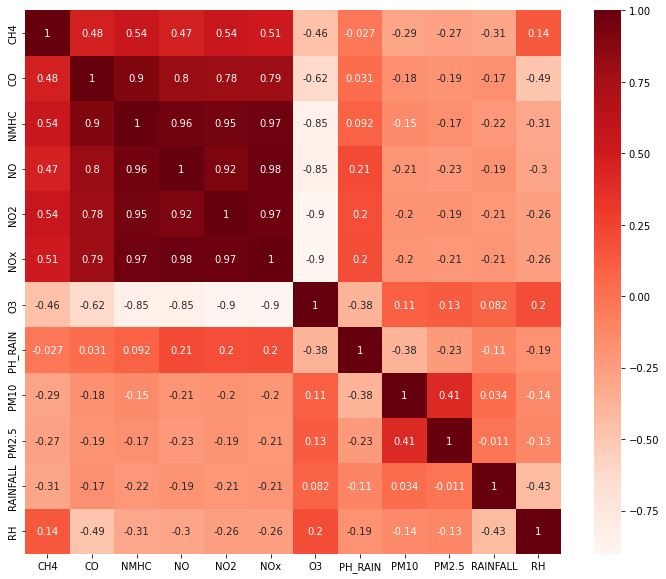

In [25]:
data3 = clean_data.corr()

import seaborn as sns


plt.figure(figsize=(12,10))
cor = data3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# fig3, ax3 = plt.subplots(figsize=(10, 10))
# ax3.matshow(data3)
# ax3.set_xticklabels(clean)
# ax3.set_yticklabels(clean)
# ax3.set_xticks(np.arange(len(clean)))
# ax3.set_yticks(np.arange(len(clean)))

# for (i, j), z in np.ndenumerate(data3):
#     ax3.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [26]:
data3 = pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv',parse_dates = ['time'])
data3['year'] = data3['time'].dt.to_period('Y')
data3['month'] = data3['time'].dt.to_period('M')
data3['day'] = data3['time'].dt.to_period('D')
data3['8hour'] = data3['time'].dt.to_period('8H')

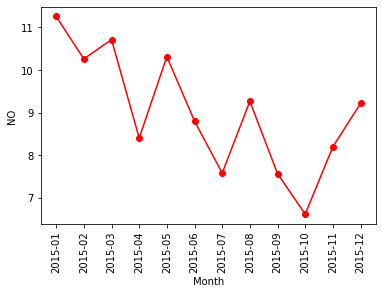

In [27]:
# months = data3.groupby(data3['month'])['NO'].mean()
# ls = list(data3['month'].unique())
# ls.sort()
# plot2 = plt.plot(ls, months, marker = 'o', color='r')

data3['NO'] = data3['NO'].apply(numeric)

months = data3.groupby(data3['month'])['NO'].mean()
data3['month'] = data3['month'].astype(str)
ls = (data3['month'].unique())
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('NO')
plot2 = plt.plot(ls, months, marker = 'o', color='r')

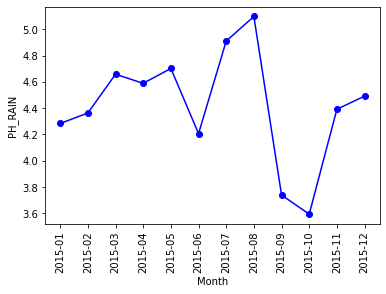

In [28]:
data3.drop(data3[data3['PH_RAIN'] == 'NR'].index, inplace = True)
data3['PH_RAIN'] = data3['PH_RAIN'].apply(numeric)

months = data3.groupby(data3['month'])['PH_RAIN'].mean()
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('PH_RAIN')
plot2 = plt.plot(ls, months, marker = 'o', color='b')

In [29]:
data3.dropna(inplace = True)
data3['PH_RAIN'] = data3['PH_RAIN'].apply(numeric)
data3['PH_RAIN']

284     4.9
285     4.7
310     3.9
311     4.0
313     4.4
       ... 
8657    5.0
8663    5.0
8664    4.4
8665    4.4
8724    6.2
Name: PH_RAIN, Length: 642, dtype: float64

In [30]:
dictionary = {
    "Acidic Rain": 0,
    "Clear Rain": 0,
    "Pure Water": 0
}
tmp = {}
for i in range(len(data3['PH_RAIN'])):
    if data3['PH_RAIN'].iloc[i] < 5:
        tmp[data3['PH_RAIN'].iloc[i]] = "Acidic Rain"
        dictionary['Acidic Rain'] += 1
    if data3['PH_RAIN'].iloc[i] >= 5 and data3['PH_RAIN'].iloc[i] < 5.5:
        tmp[data3['PH_RAIN'].iloc[i]] = "Clear Rain"
        dictionary['Clear Rain'] += 1
    if data3['PH_RAIN'].iloc[i] >= 5.5:
        tmp[data3['PH_RAIN'].iloc[i]] = "Pure Water"
        dictionary['Pure Water'] += 1


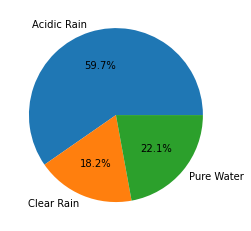

In [31]:
data3["PH_RAIN"].replace(tmp, inplace=True)
plt.pie(dictionary.values(), labels=dictionary.keys(), autopct='%1.1f%%')
plt.show()

In [95]:
data3['SO2'] = data3['SO2'].apply(numeric)
data3['CO'] = data3['CO'].apply(numeric)
data3['O3'] = data3['O3'].apply(numeric)
data3['NOx'] = data3['NOx'].apply(numeric)
data3['NO'] = data3['NO'].apply(numeric)
data3['NO2'] = data3['NO2'].apply(numeric)
data3['THC'] = data3['THC'].apply(numeric)
data3['NMHC'] = data3['NMHC'].apply(numeric)
data3['CH4'] = data3['CH4'].apply(numeric)

test_data = data3[['PH_RAIN', 'SO2', 'CO', 'O3', 'NOx', 'NO', 'NO2', 'THC', 'NMHC', 'CH4']]

acc = 0

for _ in range(20):
    df_train, df_test = train_test_split(test_data, test_size=0.1)
    X_train, y_train = df_train.iloc[:, 1: ].to_numpy(), df_train['PH_RAIN'].to_numpy()
    X_test, y_test = df_test.iloc[:, 1: ].to_numpy(), df_test['PH_RAIN'].to_numpy()
    clf = LogisticRegression(solver='newton-cg', max_iter = 40000, multi_class='multinomial')
    clf.fit(X_train, y_train)

    # Predict y_pred using the fitted model above
    y_pred = clf.predict(X_test)

    # Compute the average accuracy
    acc += accuracy_score(y_test, y_pred)

acc /= 20
print("Accuracy Score is: {}".format(acc))

Accuracy Score is: 0.7076923076923076


In [102]:
acc_MLP = 0

for _ in range(20):
    df_train, df_test = train_test_split(test_data, test_size=0.2)
    X_train, y_train = df_train.iloc[:, 1: ].to_numpy(), df_train['PH_RAIN'].to_numpy()
    X_test, y_test = df_test.iloc[:, 1: ].to_numpy(), df_test['PH_RAIN'].to_numpy()
    
    mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=10000)
    mlp.fit(X_train, y_train)
    
    # Predict y_pred using the fitted model above
    y_pred = mlp.predict(X_test)
    
    # Compute the average accuracy
    acc_MLP += accuracy_score(y_test, y_pred)
    
acc_MLP /= 20
acc_MLP

0.6779069767441859